In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
from scipy.stats import kurtosis, powerlaw, norm
from numpy import cumsum, log, polyfit, sqrt, std, subtract
from numpy.random import randn

In [28]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:
#Import data
#data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Pratica_Final_MMC/ohlc1d.csv",header=0, index_col='Datetime')
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Pratica_Final_MMC/ohlc1d.csv")



In [20]:
print(data)

        Datetime          Open          High           Low         Close
0     2011-12-31      4.390000      4.580000      4.390000      4.580000
1     2012-01-01      4.580000      5.000000      4.580000      5.000000
2     2012-01-02      5.000000      5.000000      5.000000      5.000000
3     2012-01-03      5.320000      5.320000      5.140000      5.290000
4     2012-01-04      4.930000      5.570000      4.930000      5.570000
...          ...           ...           ...           ...           ...
4197  2023-06-28  30696.560547  30703.279297  29921.822266  30086.246094
4198  2023-06-29  30086.187500  30796.250000  30057.203125  30445.351563
4199  2023-06-30  30441.353516  31256.863281  29600.275391  30477.251953
4200  2023-07-01  30471.847656  30641.289063  30328.865234  30590.078125
4201  2023-07-02  30588.164063  30649.216797  30389.457031  30590.972656

[4202 rows x 5 columns]


In [30]:
# Calcular a variação ao longo do tempo (diferença entre os valores de Close)
variation = np.diff(data['Close'])

# Calcular o desvio quadrático médio ao longo do tempo
squared_deviation = variation ** 2
mean_squared_deviation = np.mean(squared_deviation)

# Criar uma lista com os índices do tempo (1, 2, 3, ...)
time = np.arange(1, len(variation) + 1)

# Adicionar uma constante ao vetor de tempo para gerar uma interceptação
constant = np.ones_like(time)

# Filtrar os valores de squared_deviation que são maiores que zero
nonzero_indices = squared_deviation > 0
filtered_squared_deviation = squared_deviation[nonzero_indices]
filtered_time = time[nonzero_indices]
filtered_constant = constant[nonzero_indices]

# Criar a matriz de entrada para a regressão linear
time_with_constant = np.column_stack((filtered_time, filtered_constant))

print(filtered_squared_deviation)

[1.76400000e-01 8.41000000e-02 7.84000000e-02 ... 1.01763488e+03
 1.27297451e+04 8.00185710e-01]


In [31]:
# Converter os valores para logxlog
log_filtered_squared_deviation = np.log(filtered_squared_deviation)
log_time_with_constant = np.log(filtered_time)

# Realizar a regressão linear logxlog
slope, intercept, r_value, p_value, std_err = linregress(log_time_with_constant, log_filtered_squared_deviation)

# Calcular as estatísticas da regressão linear
slope_std_err = std_err * np.sqrt(len(log_time_with_constant))  # Erro padrão da inclinação (slope)
r_squared = r_value**2  # Coeficiente de determinação (R²)

# Calcular o erro quadrático médio R2
predicted = slope * log_time_with_constant + intercept
residuals = log_filtered_squared_deviation - predicted
mse = np.mean(residuals ** 2)
r2 = 1.0 - mse / np.var(log_filtered_squared_deviation)

# Imprimir as estatísticas da regressão linear e o erro quadrático médio R2
print("Estatísticas da Regressão Linear:")
print(f"Inclinação (slope): {slope}")
print(f"Interceptação: {intercept}")
print(f"Erro padrão da inclinação: {slope_std_err}")
print(f"Coeficiente de determinação (R²): {r_squared}")

print("\nErro Quadrático Médio R2:")
print(f"Erro Quadrático Médio R2: {r2}")



Estatísticas da Regressão Linear:
Inclinação (slope): 4.565997210514398
Interceptação: -27.163011046574294
Erro padrão da inclinação: 3.687222054487618
Coeficiente de determinação (R²): 0.6053975287526773

Erro Quadrático Médio R2:
Erro Quadrático Médio R2: 0.6053975287526769


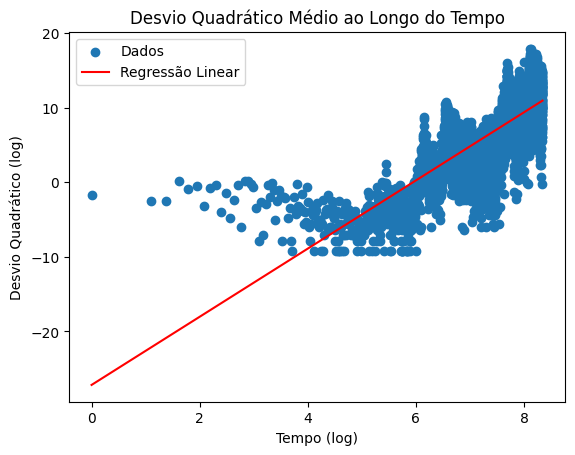

In [23]:
# Plotar o gráfico de regressão linear logxlog
plt.scatter(log_time_with_constant, log_filtered_squared_deviation, label='Dados')
plt.plot(log_time_with_constant, slope * log_time_with_constant + intercept, 'r', label='Regressão Linear')
plt.xlabel('Tempo (log)')
plt.ylabel('Desvio Quadrático (log)')
plt.title('Desvio Quadrático Médio ao Longo do Tempo')
plt.legend()
plt.show()

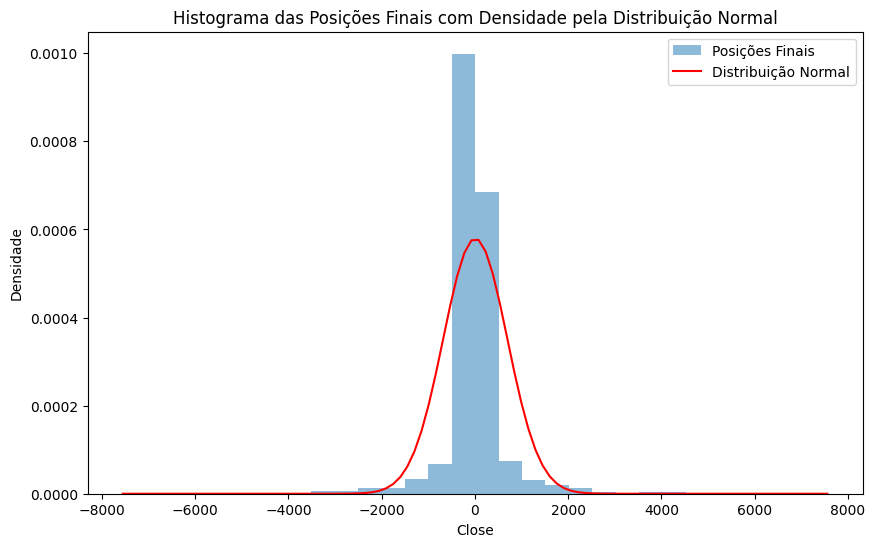

Curtose: 23.160027396040988
Expoente da Lei de Potência Ajustado: -2.860004566006831
Hipótese Nula: Random Walk é verdadeiro (slope = 1)
Resultado do Teste de Hipóteses: Hipótese nula rejeitada


In [32]:
# Calcular a curtose da variável "Close"
close_data = np.diff(data['Close'])
#close_data = data['Close']
curtose = kurtosis(close_data)

# Calcular o expoente da lei de potência ajustado pela curtose
slope = 1 - (curtose / 6)

# Teste de hipóteses para o expoente da lei de potência com ajuste pela curtose
null_hypothesis = "Random Walk é verdadeiro (slope = 1)"
if slope == 1:
    result = "Hipótese nula confirmada"
else:
    result = "Hipótese nula rejeitada"

# Plotar histograma das posições finais das caminhadas (Close)
plt.figure(figsize=(10, 6))
plt.hist(close_data, bins=30, density=True, alpha=0.5, label='Posições Finais')
plt.xlabel('Close')
plt.ylabel('Densidade')

# Estimar densidade pela distribuição normal
mu, std = norm.fit(close_data)
x = np.linspace(min(close_data), max(close_data), 100)
y = norm.pdf(x, mu, std)
plt.plot(x, y, 'r-', label='Distribuição Normal')

# Configurar título e legenda do gráfico
plt.title('Histograma das Posições Finais com Densidade pela Distribuição Normal')
plt.legend()

# Exibir o gráfico
plt.show()

# Imprimir a curtose, o expoente da lei de potência ajustado e o resultado do teste de hipóteses
print('Curtose:', curtose)
print('Expoente da Lei de Potência Ajustado:', slope)
print('Hipótese Nula:', null_hypothesis)
print('Resultado do Teste de Hipóteses:', result)


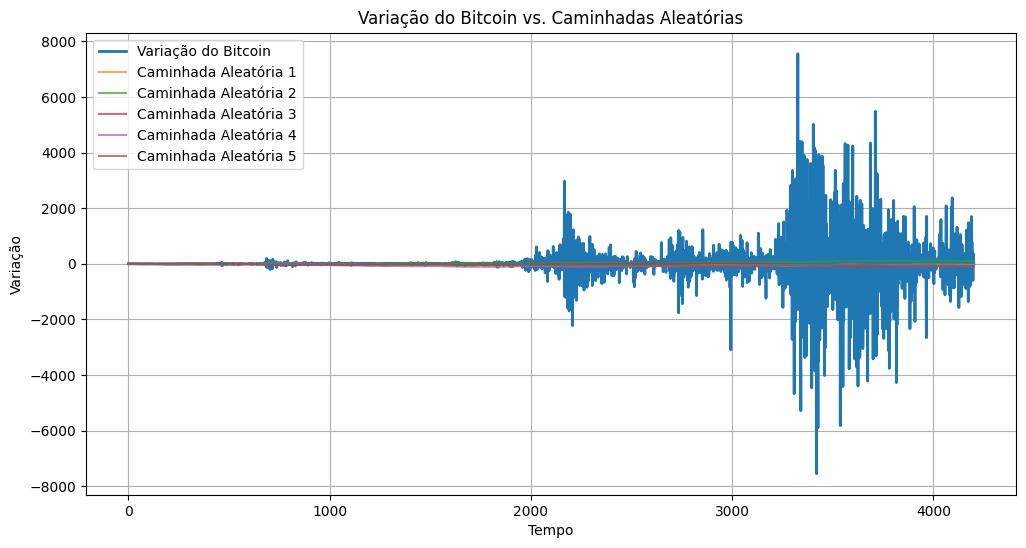

In [33]:
# Calcular a variação ao longo do tempo (diferença entre os valores de Close)
variation = np.diff(data['Close'])

# Gerar caminhadas aleatórias (random walk)
num_walks = 5  # Número de caminhadas aleatórias a serem geradas
num_steps = len(variation)  # Número de passos na caminhada (mesmo que a variação)
random_walks = np.cumsum(np.random.choice([-1, 1], size=(num_steps, num_walks)), axis=0)

# Plotar um gráfico comparando a variação do bitcoin com as caminhadas aleatórias
plt.figure(figsize=(12, 6))
plt.plot(variation, label='Variação do Bitcoin', linewidth=2)
plt.plot(random_walks, alpha=0.7)
plt.xlabel('Tempo')
plt.ylabel('Variação')
plt.title('Variação do Bitcoin vs. Caminhadas Aleatórias')
plt.legend(['Variação do Bitcoin'] + [f'Caminhada Aleatória {i+1}' for i in range(num_walks)])
plt.grid(True)
plt.show()

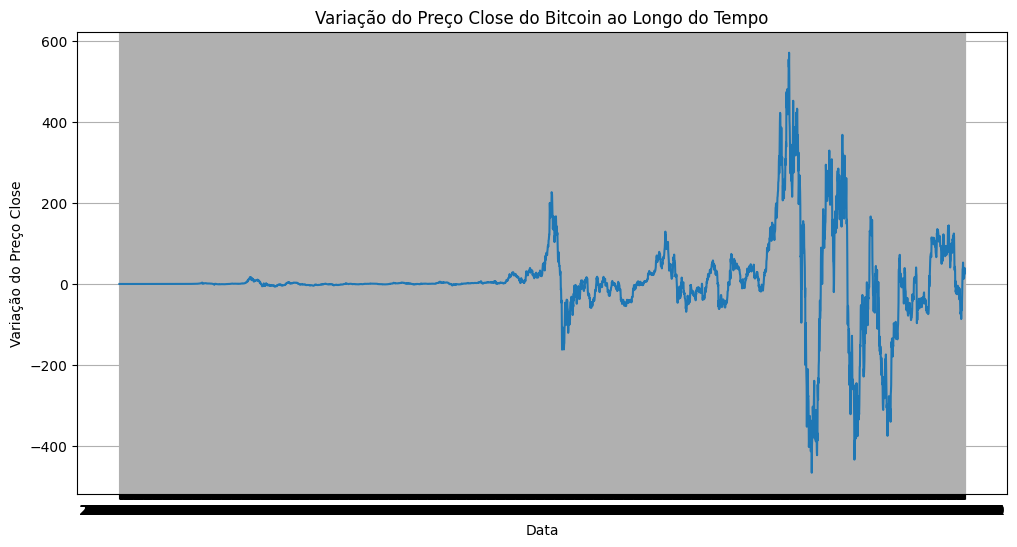

In [50]:
# Realizar a diferenciação na coluna 'Close'
data['Close_diff'] = data['Close'].diff()

# Suavização - médias móveis com janela de 7 dias
data['Close_smooth'] = data['Close_diff'].rolling(window=7).mean()

data['Close']=data['Close_smooth']
# Remover a primeira linha que terá um valor NaN após a diferenciação
data = data.dropna()
# Salvar os dados transformados em um novo arquivo CSV
data.to_csv('/content/drive/MyDrive/Colab Notebooks/Pratica_Final_MMC/ohlc1d_variation.csv', index=False)

# Plotar a variação do preço Close ao longo do tempo
plt.figure(figsize=(12, 6))
plt.plot(data['Datetime'], data['Close_smooth'])
plt.xlabel('Data')
plt.ylabel('Variação do Preço Close')
plt.title('Variação do Preço Close do Bitcoin ao Longo do Tempo')
plt.grid(True)

# Exibir o gráfico
plt.show()



In [38]:
print(data)

        Datetime          Open          High           Low       Close  \
0     2012-01-14      6.500000      6.500000      6.300000    0.122857   
1     2012-01-15      7.150000      7.150000      7.150000    0.153571   
2     2012-01-16      6.200000      7.100000      6.200000    0.150000   
3     2012-01-17      6.500000      6.900000      6.000000    0.050714   
4     2012-01-18      5.990000      7.100000      5.990000    0.109286   
...          ...           ...           ...           ...         ...   
4183  2023-06-28  30696.560547  30703.279297  29921.822266  354.397879   
4184  2023-06-29  30086.187500  30796.250000  30057.203125  347.782645   
4185  2023-06-30  30441.353516  31256.863281  29600.275391  296.413504   
4186  2023-07-01  30471.847656  30641.289063  30328.865234  291.385882   
4187  2023-07-02  30588.164063  30649.216797  30389.457031  303.911412   

      Close_diff  Close_smooth  
0      -0.300000      0.122857  
1       0.850000      0.153571  
2      -0.05

In [51]:
#Import data
#data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Pratica_Final_MMC/ohlc1d.csv",header=0, index_col='Datetime')
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Pratica_Final_MMC/ohlc1d_variation.csv")

In [ ]:
print(data) #dados já com amortização e suavição

        Datetime          Open          High           Low      Close  \
0     2012-01-14      6.500000      6.500000      6.300000  -0.071429   
1     2012-01-15      7.150000      7.150000      7.150000   0.021429   
2     2012-01-16      6.200000      7.100000      6.200000   0.114286   
3     2012-01-17      6.500000      6.900000      6.000000  -0.162857   
4     2012-01-18      5.990000      7.100000      5.990000   0.014286   
...          ...           ...           ...           ...        ...   
4183  2023-06-28  30696.560547  30703.279297  29921.822266   8.421317   
4184  2023-06-29  30086.187500  30796.250000  30057.203125  76.152902   
4185  2023-06-30  30441.353516  31256.863281  29600.275391 -31.173828   
4186  2023-07-01  30471.847656  30641.289063  30328.865234   5.911830   
4187  2023-07-02  30588.164063  30649.216797  30389.457031  15.815848   

      Close_diff  Close_smooth  
0      -0.300000     -0.071429  
1       0.850000      0.021429  
2      -0.050000      0.

In [52]:
from statsmodels.tsa.stattools import adfuller
# Selecionar a coluna 'Close'
close_data = data['Close_diff']
# Executar o teste de Dickey-Fuller Aumentado (ADF)
result = adfuller(close_data)

# Extrair as estatísticas do teste
adf_statistic = result[0]
p_value = result[1]
critical_values = result[4]

# Imprimir o resultado do teste
alpha = 0.05  # Nível de significância

print("Resultado do Teste de Dickey-Fuller Aumentado (ADF):")
print("Estatística ADF:", adf_statistic)
print("Valor-p:", p_value)
print("Valores críticos:")
for key, value in critical_values.items():
    print(f"{key}: {value}")

if adf_statistic < critical_values['5%']:
    print("Rejeitar a hipótese nula. A série é estacionária.")
else:
    print("Não há evidências para rejeitar a hipótese nula. A série não é estacionária.")

Resultado do Teste de Dickey-Fuller Aumentado (ADF):
Estatística ADF: -10.361085339277516
Valor-p: 2.395539147548422e-18
Valores críticos:
1%: -3.431942065422698
5%: -2.8622434872361695
10%: -2.5671444728600945
Rejeitar a hipótese nula. A série é estacionária.


In [53]:
import pandas as pd
import matplotlib.pyplot as plt

# Calcular a diferença entre os valores de fechamento (close)
close_diff = data['Close'].diff().dropna()

# Função para calcular o coeficiente de Hurst usando o método da Variância Agregada
def hurst_coefficient(close_diff, window_size):
    total_size = len(close_diff)
    subseries = [close_diff[i:i+window_size] for i in range(0, total_size, window_size)]
    avg_variances = []

    for subset in subseries:
        subset_size = len(subset)
        subset_mean = sum(subset) / subset_size
        deviations = [val - subset_mean for val in subset]
        cumulative_sum = [sum(deviations[:i+1]) for i in range(subset_size)]
        cumulative_range = max(cumulative_sum) - min(cumulative_sum)
        subset_variance = sum([dev**2 for dev in deviations]) / subset_size
        avg_variance = subset_variance / cumulative_range
        avg_variances.append(avg_variance)

    return sum(avg_variances) / len(avg_variances)

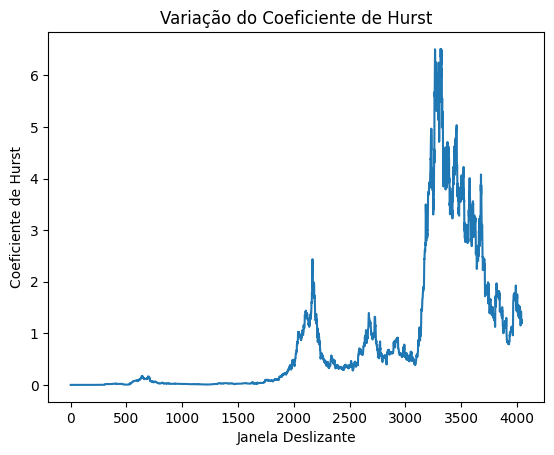

Coeficiente de Hurst para a série temporal: 0.8912227455745423


In [54]:
# Calcular o coeficiente de Hurst com janelas deslizantes de tamanho 100
window_size = 100
coefficients = []


for i in range(len(close_diff) - window_size + 1):
    subset = close_diff[i:i+window_size]
    coefficient = hurst_coefficient(subset, window_size)
    coefficients.append(coefficient)
  #  print(f"Janela Deslizante {i+1}: Coeficiente de Hurst = {coefficient}")

# Plotar o gráfico da variação do coeficiente de Hurst
plt.plot(coefficients)
plt.xlabel('Janela Deslizante')
plt.ylabel('Coeficiente de Hurst')
plt.title('Variação do Coeficiente de Hurst')
plt.show()

# Calcular o coeficiente de Hurst para toda a série
hurst = hurst_coefficient(close_diff,100)
print(f"Coeficiente de Hurst para a série temporal: {hurst}")